# ◢ Perceptual Losses for Real-Time Style Transfer and Super-Resolution

This repository contains a pytorch implementation of an algorithm for artistic style transfer. The algorithm mixes the content of an image with the style of another image.

In [9]:
import cv2
import torch
import numpy as np

from PIL import Image
from torchvision import transforms

from matplotlib import pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.mul(255))
])

In [19]:
image = Image.open('./samples/SSBO_1.jpg').convert('RGB')
image = transform(image)
image = image.unsqueeze(0)

In [5]:
model = torch.jit.load('./weights/Transformer@vg_starry_night.pt')

In [23]:
stylized_image = model(image)

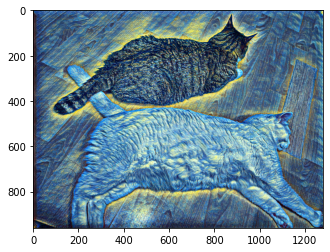

In [24]:
stylized_image = stylized_image.detach().numpy()
stylized_image = stylized_image[0].transpose((1, 2, 0))
stylized_image = np.clip(stylized_image, 0, 255).astype(np.uint8)

cv2.imwrite('./samples/output.png', cv2.cvtColor(stylized_image, cv2.COLOR_RGB2BGR))

# stylized_image = cv2.cvtColor(stylized_image, cv2.COLOR_RGB2BGR)
plt.imshow(stylized_image)